<a href="https://colab.research.google.com/github/krldlamini/edm_brazildengue/blob/main/Data_Analysis/notebooks/Cases_Climate_Merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merge case data with climate data

This file merges time series data for dengue cases with time series data for the 5 climate variables  of interest. This is done for 11 Brazilian Municipalities. Time series plots are also produced.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fix cases data for merging

Merge GOIÂNIA and APARECIDA DE GOIÂNIA

In [ ]:
Goiania = pd.read_csv('drive/MyDrive/Dengue_BR/Input_Documents/new_climate_cases/520870_A002_total.csv', sep=";")
Aparecida_de_Goiania = pd.read_csv('drive/MyDrive/Dengue_BR/Input_Documents/new_climate_cases/520140_A002_total.csv', sep=";")

In [ ]:
# Sum the "CASES" and "IMPORTED" columns for each DataFrame
sum_cases = Goiania['CASES'] + Aparecida_de_Goiania['CASES']
sum_imported = Goiania['IMPORTED'] + Aparecida_de_Goiania['IMPORTED']

# New DataFrame with the combined data
combined_df = pd.DataFrame({
    'Unnamed: 0': Goiania['Unnamed: 0'],
    'SIN_YEAR': Goiania['SIN_YEAR'],
    'SIN_WEEK': Goiania['SIN_WEEK'],
    'FIRST_DAY': Goiania['FIRST_DAY'],
    'CASES': sum_cases,
    'IMPORTED': sum_imported
})

Save new combined file

In [ ]:
file_path = 'drive/MyDrive/Dengue_BR/Input_Documents/new_climate_cases/'
pd.DataFrame(combined_df).to_csv(file_path+'520870_520140_A002_total.csv', sep =';', index=False)


Fix cases data for each municipality


In [ ]:
code_municip = ["221100_A312","261160_A301", "310620_A521", "317020_A507", "330455_A652", "355030_A701",
                "172100_A009", "500270_A702","510340_A901", "520870_520140_A002", "530010_A001"]

In [ ]:
for code in code_municip:
    file_path = 'drive/MyDrive/Dengue_BR/Input_Documents/new_climate_cases/'+str(code)+'_total.csv'
    file_read = pd.read_csv(file_path, delimiter= ';')
    file_read = file_read.drop(columns = ['Unnamed: 0'])
    file_read = file_read[file_read['SIN_YEAR'] >= 2007]
    file_read = file_read[file_read['SIN_YEAR'] <= 2021]
    file_read = file_read.drop(columns = ['SIN_YEAR'])
    file_read = file_read.drop(columns = ['SIN_WEEK'])
    file_read = file_read.drop(columns = ['IMPORTED'])
    file_read = file_read.rename(columns={'FIRST_DAY': 'data'})

    #save each new csv file
    file_path2 = 'drive/MyDrive/Dengue_BR/Output_Documents/fixed_climate_cases/'
    pd.DataFrame(file_read).to_csv(file_path2+str(code)+'_total.csv')

# Create new combined files for CCM

In [ ]:
def combine_files(code_case, id_climate):
  # Read the municipality cases CSV file
  path_cases = 'drive/MyDrive/Dengue_BR/Output_Documents/fixed_climate_cases/'+str(code_case)+'_total.csv'
  pd_cases = pd.read_csv(path_cases)

  # Read the climate CSV file
  path_climate = 'drive/MyDrive/Dengue_BR/Output_Documents/Weather_Stations/'+str(id_climate)+'_climate.csv'
  pd_climate = pd.read_csv(path_climate)

  # Specify the common column name
  common_column = 'data'

  # Combine the two DataFrames based on the common column
  combined_df = pd.merge(pd_climate, pd_cases, on=common_column, how='inner')
  combined_df = combined_df.drop(columns = ['Unnamed: 0'])
  column_to_move = combined_df.pop("CASES") #reorder so that cases is in the 2nd column
  combined_df.insert(1, "cases", column_to_move)

  #save each new csv file
  file_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Combined_Files/'
  pd.DataFrame(combined_df).to_csv(file_path+str(code_case)+'_combined.csv')

  return

# Create new files for each municipality and corresponding weather station

In [ ]:
code_municip = ["221100_A312","261160_A301", "310620_A521", "317020_A507", "330455_A652", "355030_A701",
                "172100_A009", "500270_A702","510340_A901", "520870_520140_A002", "530010_A001"]

In [ ]:
for code in code_municip:
  combine_files(code, code[-4:])

# Function to plot time series for cases and climate variables

In [ ]:
def plot_time_series(code_id):
  file_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Combined_Files/'+str(code_id)+'_combined.csv'
  df = pd.read_csv(file_path, delimiter= ',')

  # Convert the first column to datetime
  df['data'] = pd.to_datetime(df['data'])

  # Create a 2 by 3 figure for the plots
  fig, axes = plt.subplots(2, 3, figsize=(12, 8))

  # Flatten the axes array for easy iteration
  axes = axes.flatten()
  # Define colors for each variable
  color_mapping = {
    "precipitacao_total_horario": "green",
    "temperatura_maxima_na_hora_ant": "blue",
    "temperatura_minima_na_hora_ant": "blue",
    "umidade_rel_max_na_hora_ant" : "orange",
    'umidade_rel_min_na_hora_ant':"orange"
  }

  # Iterate over each variable and plot the time series
  for i, variable in enumerate(df.columns[2:]):
    ax = axes[i]  # Get the current axis

    # Set the color based on the variable
    color = color_mapping.get(variable, "black")

    ax.plot(df['data'], df[variable], color=color)  # Plot the time series with the specified color
    ax.set_title(variable)  # Set the title for the subplot

  # Adjust the layout of the subplots
  plt.tight_layout()

  # Display the plot
  plt.show()

# "221100_A312": TERESINA

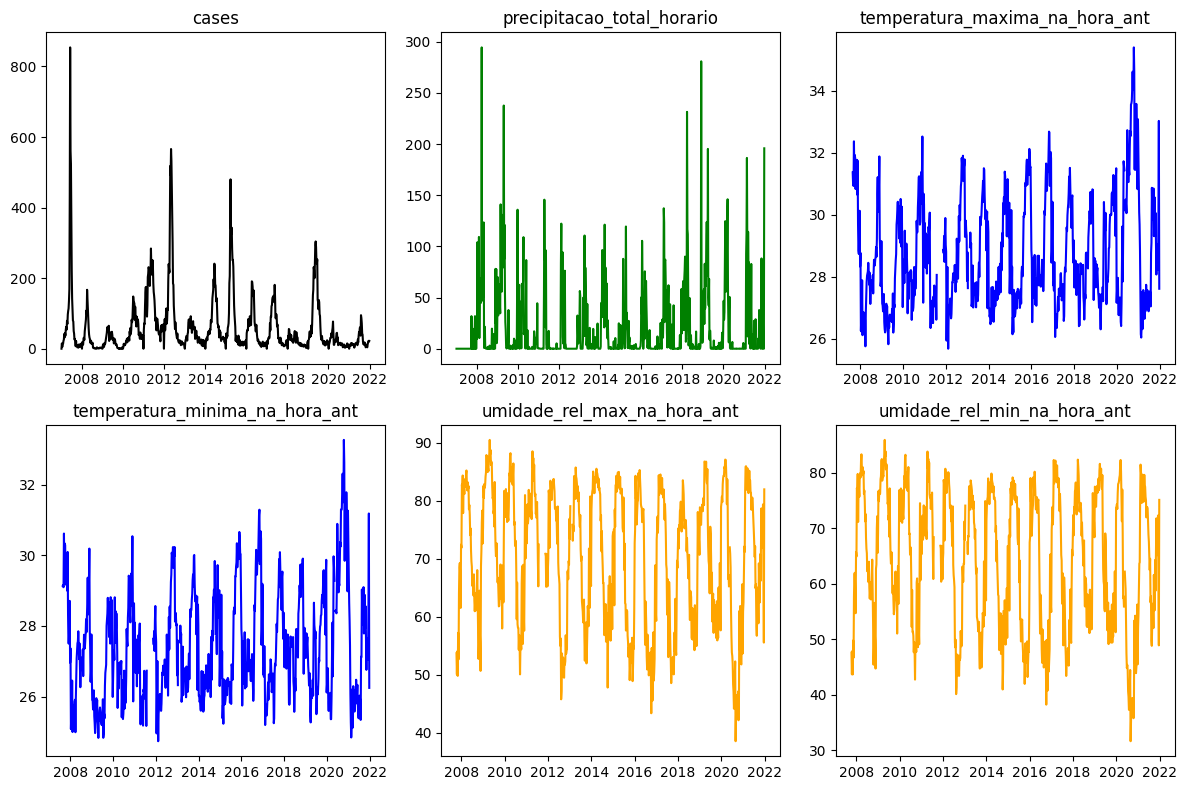

In [ ]:
code_id = "221100_A312"
plot_time_series(code_id)

# "261160_A301": RECIFE

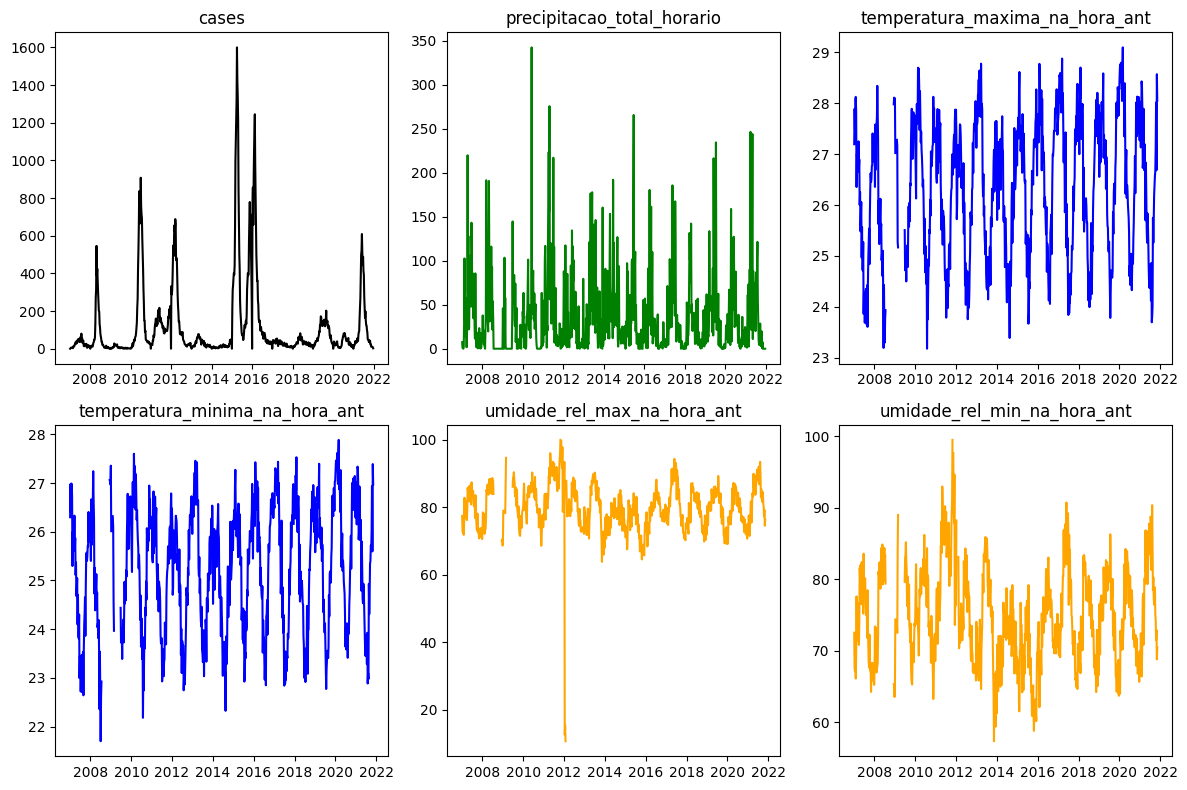

In [ ]:
code_id = "261160_A301"
plot_time_series(code_id)

# "310620_A521": BELO HORIZONTE

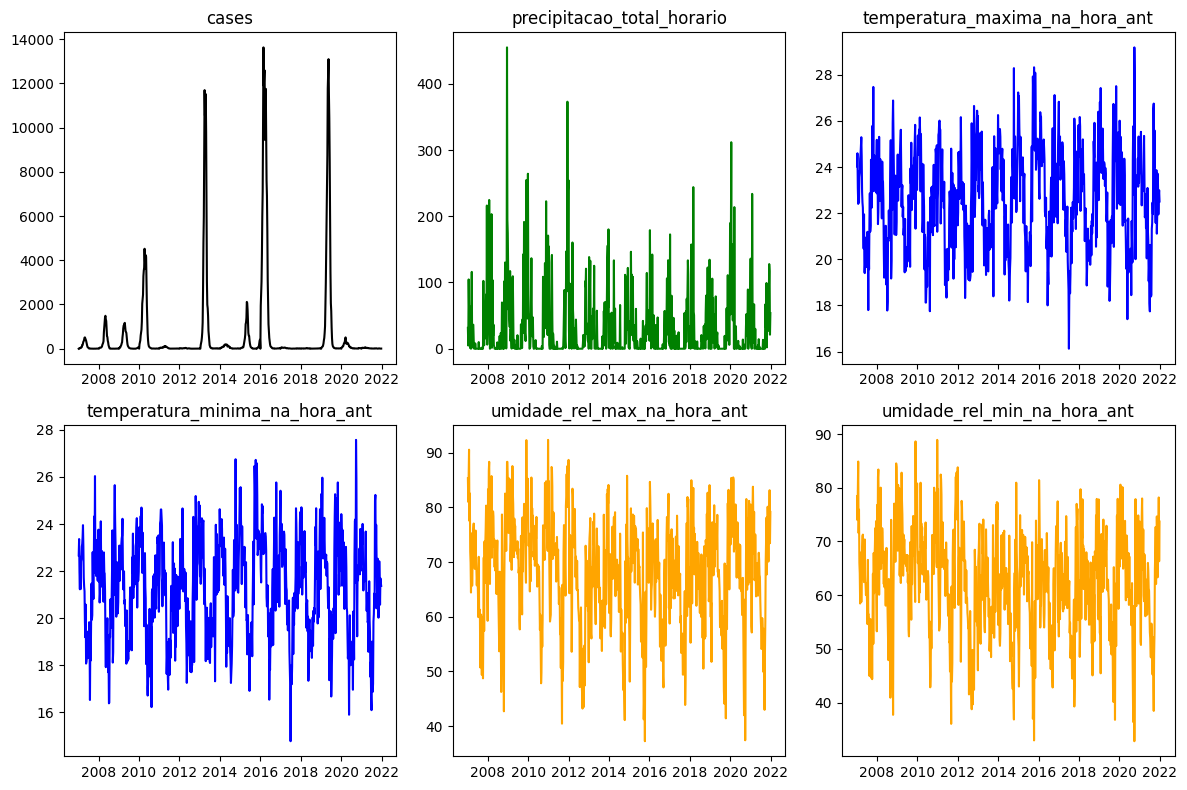

In [ ]:
code_id = "310620_A521"
plot_time_series(code_id)

# "317020_A507": UBERLÂNDIA

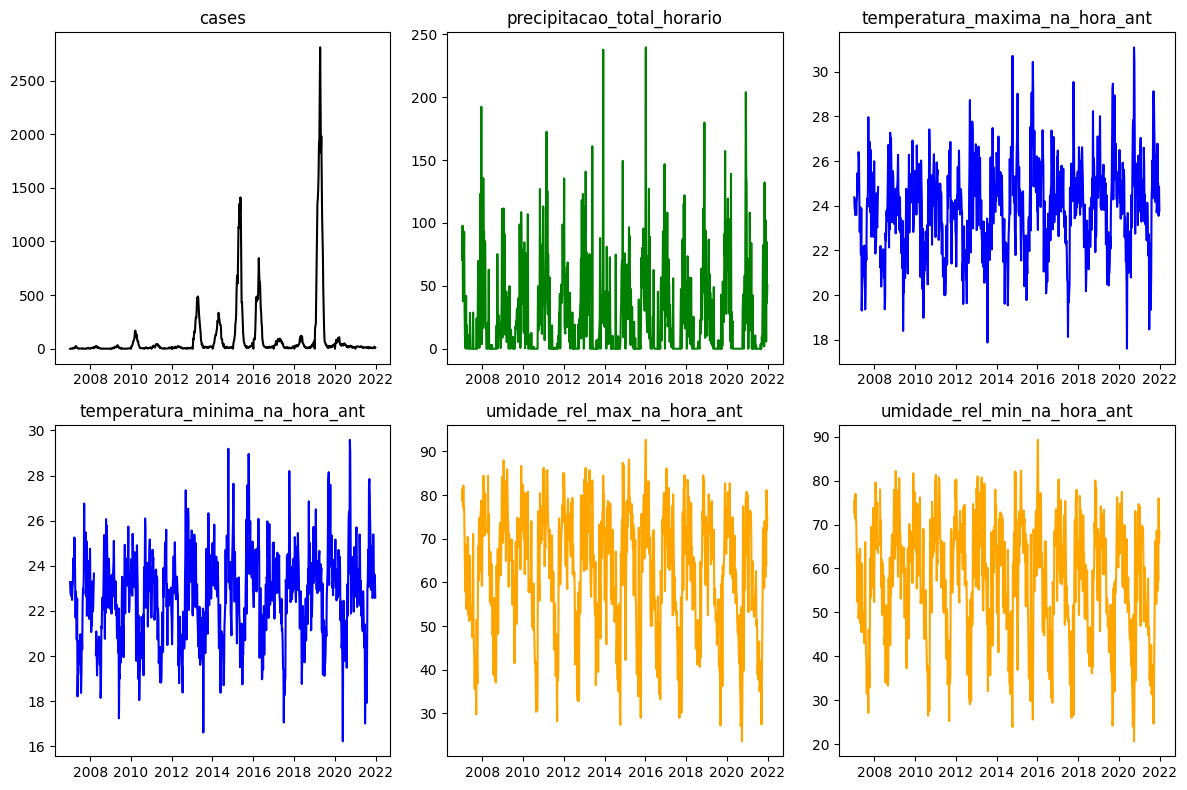

In [ ]:
code_id = "317020_A507"
plot_time_series(code_id)

"330455_A652": RIO DE JANEIRO

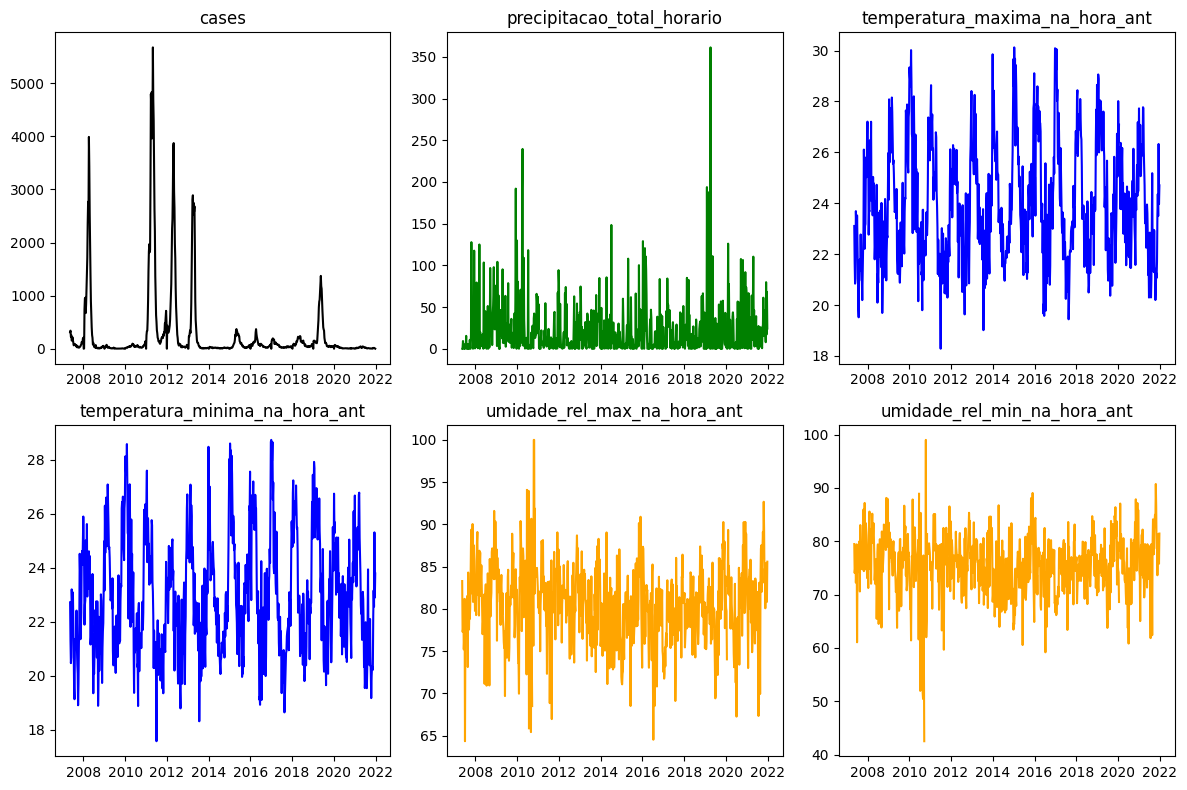

In [ ]:
code_id = "330455_A652"
plot_time_series(code_id)

# "355030_A701": SÃO PAULO

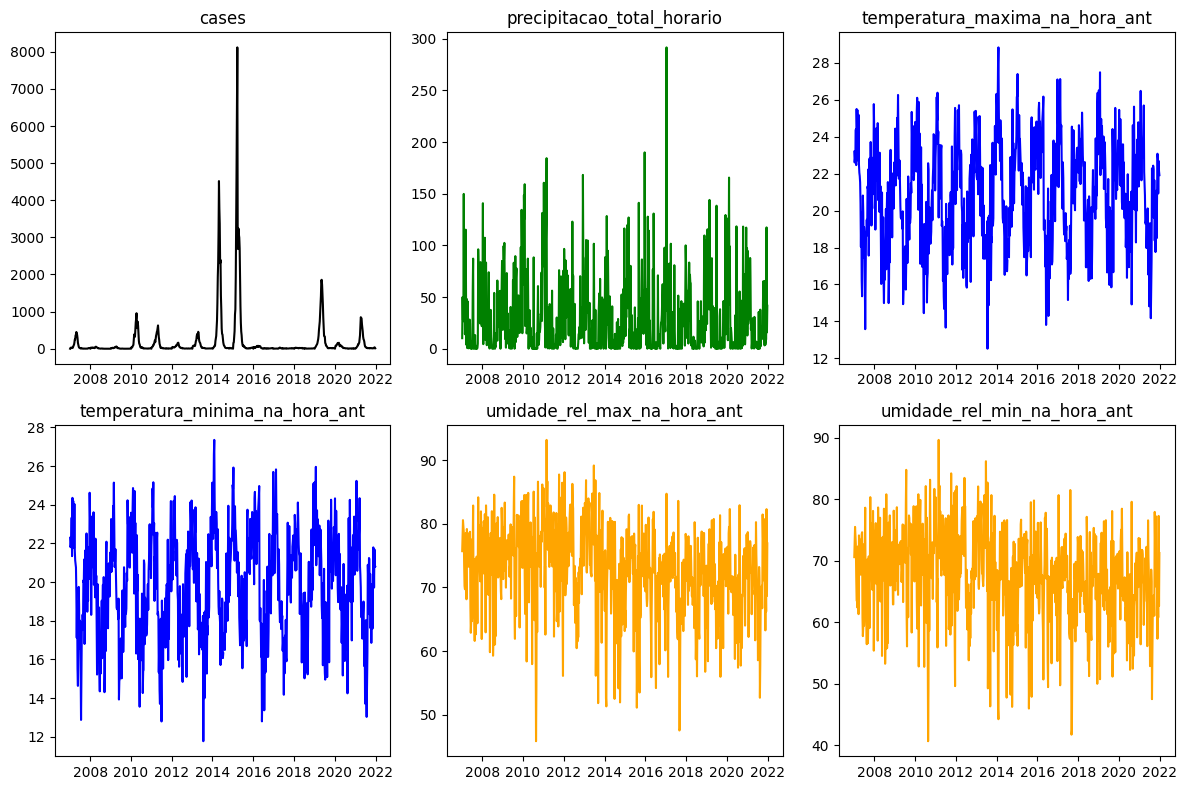

In [ ]:
code_id = "355030_A701"
plot_time_series(code_id)

# "172100_A009" : PALMAS (should be 172100)

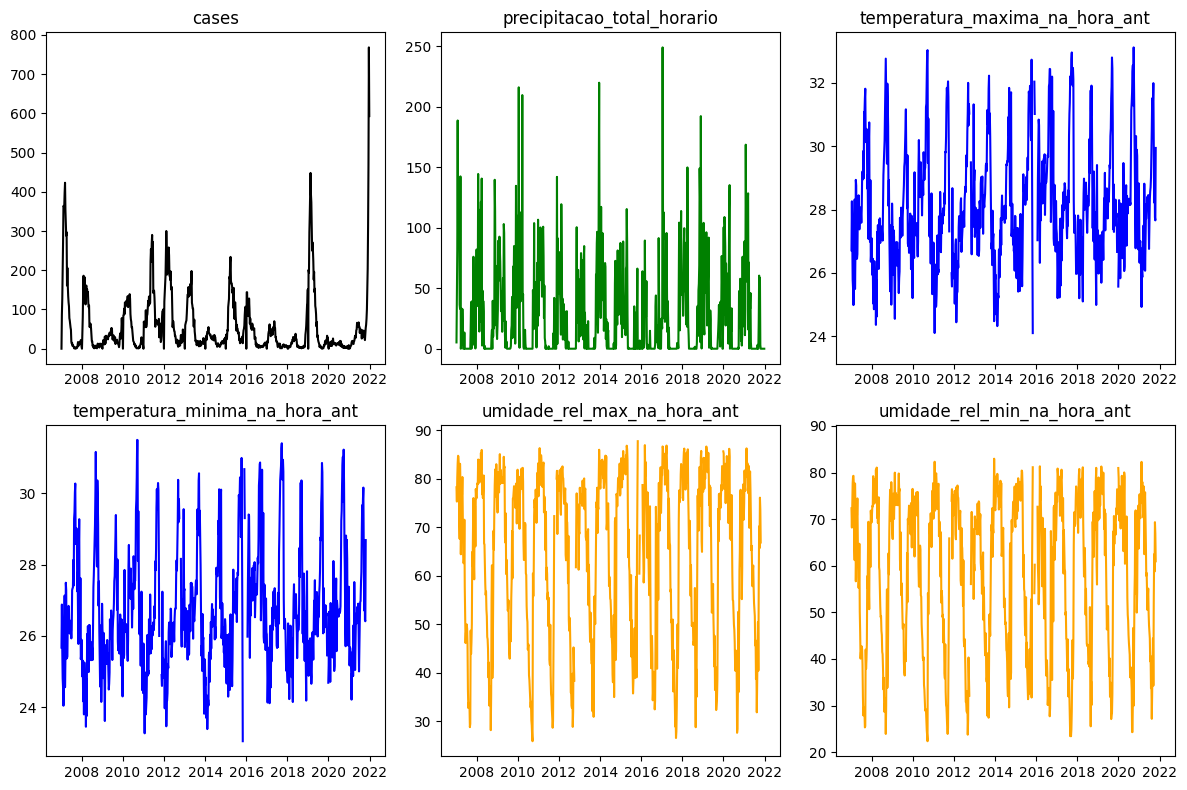

In [ ]:
code_id = "172100_A009"
plot_time_series(code_id)

# "500270_A702": CAMPO GRANDE

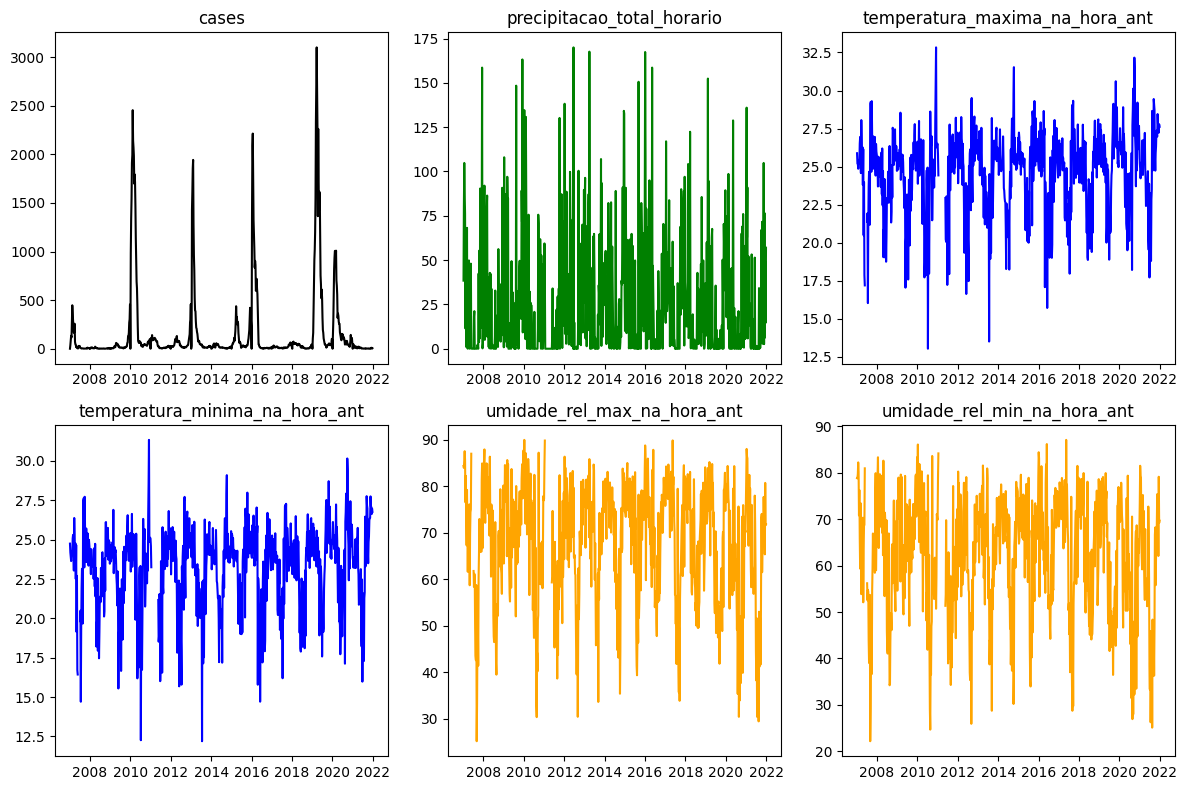

In [ ]:
code_id = "500270_A702"
plot_time_series(code_id)

"510340_A901": CUIABÁ

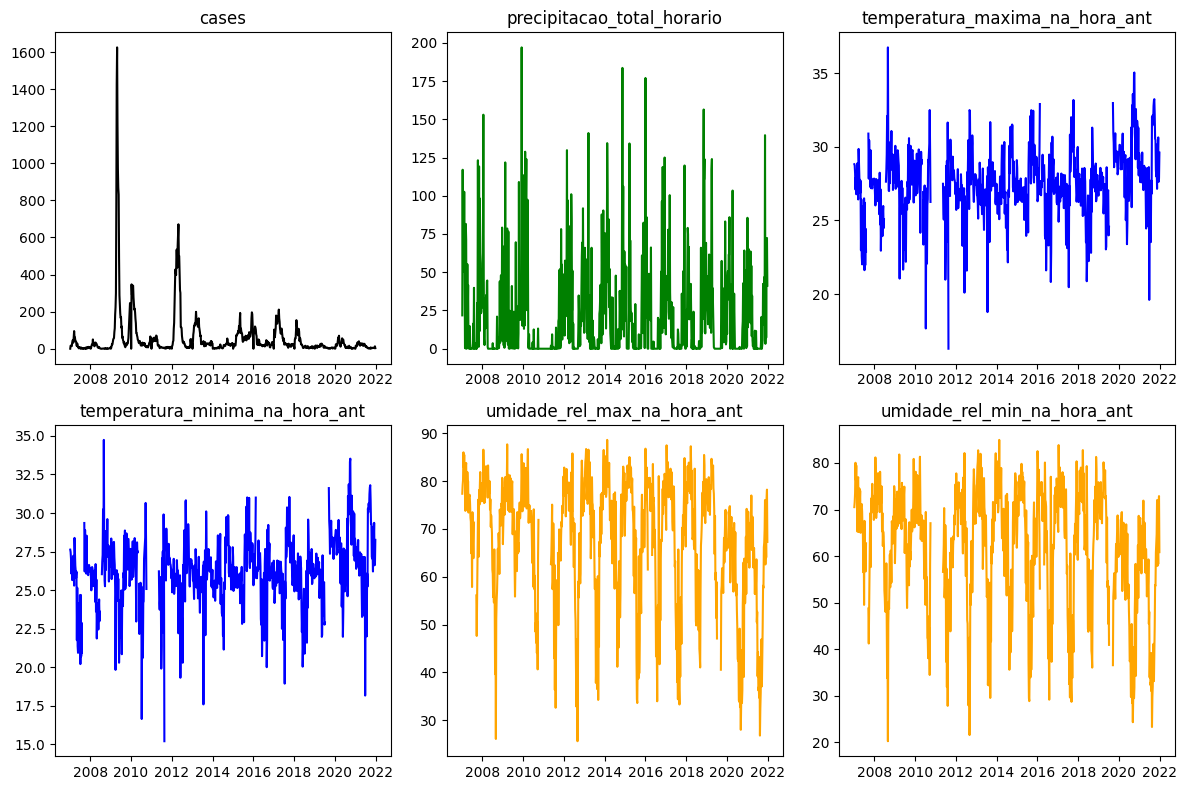

In [ ]:
code_id = "510340_A901"
plot_time_series(code_id)

# "520870_520140_A002" : GOIÂNIA and APARECIDA DE GOIÂNIA

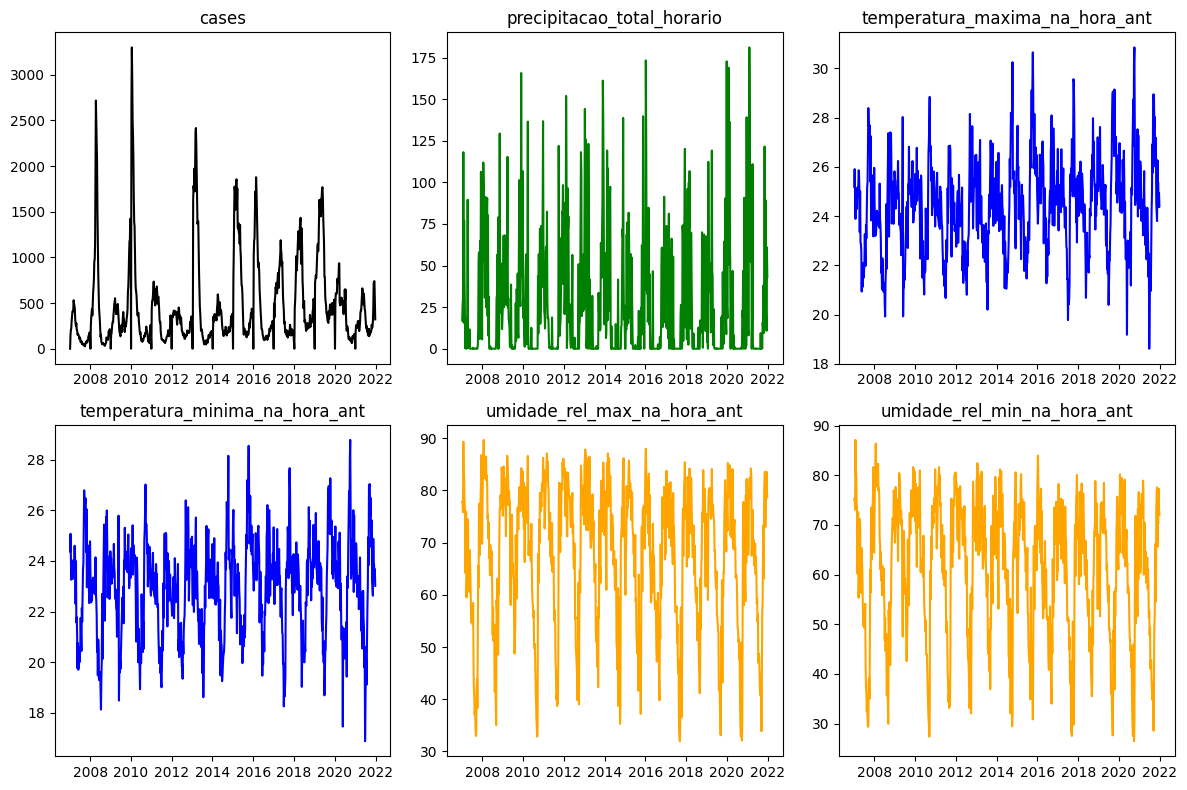

In [ ]:
code_id = "520870_520140_A002"
plot_time_series(code_id)

# "530010_A001": BRASÍLIA

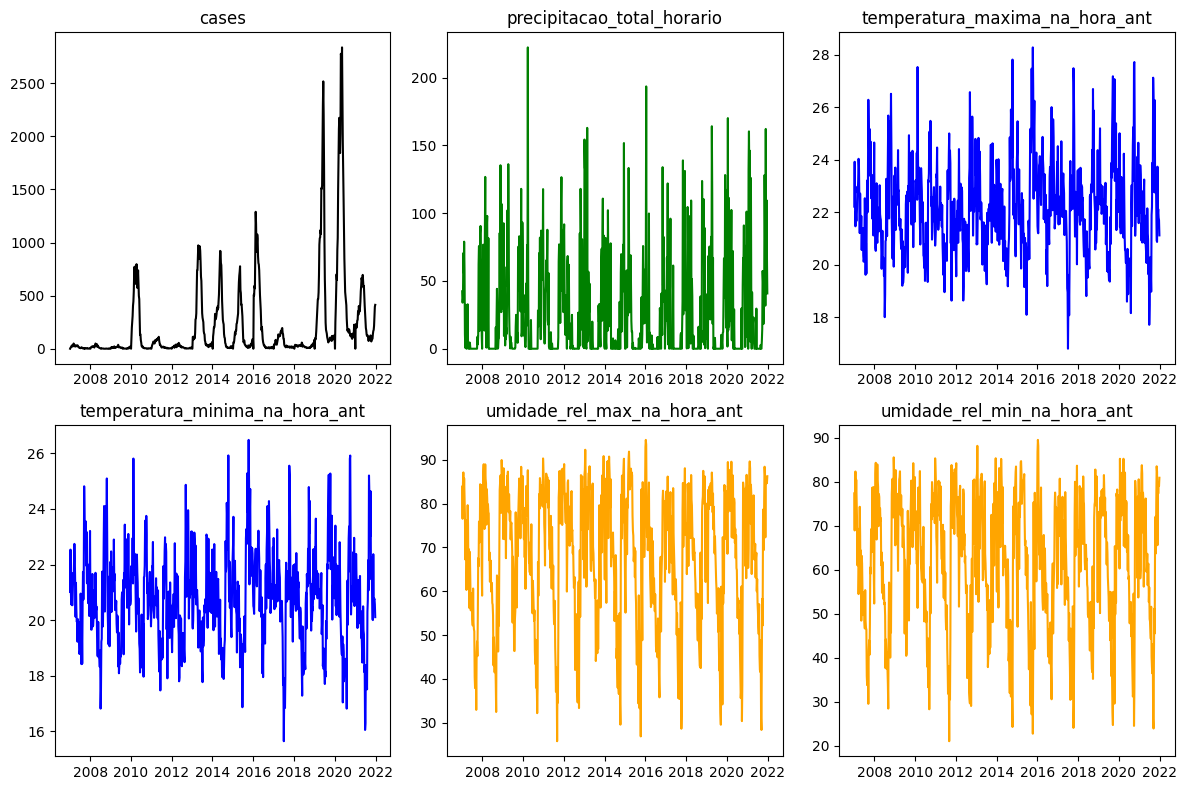

In [ ]:
code_id = "530010_A001"
plot_time_series(code_id)

In [ ]:
combine_files('530010_A001', 'A001')

,data,cases,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
0,2007-01-07,0,42.4,22.217262,21.013690,83.898810,77.410714
1,2007-01-14,9,34.0,23.924405,22.536905,76.547619,68.976190
2,2007-01-21,12,37.4,22.194048,20.989881,84.625000,77.982143
3,2007-01-28,22,70.6,21.467857,20.563690,87.136905,82.369048
4,2007-02-04,28,56.0,22.042515,20.970659,81.976048,76.251497
...,...,...,...,...,...,...,...
776,2021-11-28,177,162.2,21.913095,20.689881,85.988095,79.946429
777,2021-12-05,215,59.8,22.122024,20.735119,84.500000,77.351190
778,2021-12-12,298,109.6,21.800000,20.772619,85.422619,79.803571
779,2021-12-19,395,68.6,21.704762,20.574405,84.750000,79.071429
